In [1]:
# Load libraries
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 1.Load and check dataframe

In [2]:
data =pd.read_excel("seizuredisorder.xlsx")
data = data.drop(columns=['Unnamed: 0'])
data.head()

,seizuredisorder,ageAtAdmissiongroup,occupation_Student,maritalStatus_Married,fatherDeceased,highestEdu,useOfMobile,employmentStatus_Self-employed,motherDeceased,primarySchool_Public,employmentStatus_Employed,psychoactiveSubType_Marijuana,primarySchool_Private,forensicIssue_Arrests,chronicIllness_Seizure,occupation_Managers and Professionals,tribe_Igbo,familyType_Monogamous,presentLiving_Relatives,occupation_Service and sales workers
0,0,4,0,0,0,3,4,0,0,0,1,0,0,1,0,1,1,0,0,0
1,0,4,0,1,0,4,2,0,0,1,1,0,0,1,0,1,0,0,0,0
2,0,2,0,0,0,2,3,0,0,0,0,0,1,0,0,0,0,1,0,0
3,0,4,0,0,1,1,3,0,1,0,1,1,0,0,0,1,0,0,0,0
4,0,4,0,1,0,1,3,1,0,0,0,0,0,0,0,1,0,0,0,0


In [3]:
#Load all selected features
for col in data.columns: 
    print(col) 

seizuredisorder
ageAtAdmissiongroup
occupation_Student
maritalStatus_Married
fatherDeceased
highestEdu
useOfMobile
employmentStatus_Self-employed
motherDeceased
primarySchool_Public
employmentStatus_Employed
psychoactiveSubType_Marijuana
primarySchool_Private
forensicIssue_Arrests
chronicIllness_Seizure
occupation_Managers and Professionals
tribe_Igbo
familyType_Monogamous
presentLiving_Relatives
occupation_Service and sales workers


## 2. Split data into test and train and test the models

LR: 0.889164 (0.002769)
KNN: 0.876378 (0.007622)
CART: 0.864136 (0.010801)
NB: 0.729511 (0.014093)
SVM: 0.888889 (0.000464)


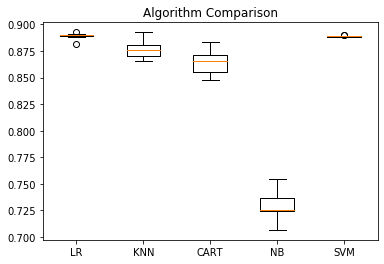

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['seizuredisorder'],axis=1)
y = data["seizuredisorder"]


X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# Spot Check Algorithms



models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

    
    # Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

## 3. Tunning The Model’s Hyperparameters

In [5]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


features = data.drop(columns=['seizuredisorder'])
labels = data['seizuredisorder']

In [6]:
#Create the function to show the results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [7]:
#Parameter grid
parameters = {
    'C': [ 10, 100, 1000]
}

#Create the model
lr = LogisticRegression(C=10)
cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(features, labels.values.ravel())

#print the results (call function print_results)
print_results(cv)

BEST PARAMS: {'C': 10}

0.833 (+/-0.231) for {'C': 10}
0.833 (+/-0.231) for {'C': 100}
0.833 (+/-0.231) for {'C': 1000}


In [8]:
#Save the best model with the best params 
LR1 = cv.best_estimator_

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('seizuredisorder', axis=1),
                                                   data['seizuredisorder'], test_size=0.30,
                                                   random_state=200)

In [10]:
#Export best model to file
joblib.dump(cv.best_estimator_, 'LR_modelsd.pkl')

['LR_modelsd.pkl']

In [11]:
#Train the model
LR1.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Make predictions
y_pred = LR1.predict(X_test)

In [13]:
import numpy as np
np.set_printoptions(threshold=np.inf)

#print predictions
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 4.Evaluation

In [14]:
# Print classification report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.94      2444
           1       0.47      0.03      0.05       283

    accuracy                           0.90      2727
   macro avg       0.68      0.51      0.50      2727
weighted avg       0.85      0.90      0.85      2727



In [15]:
#Create confusion matrix
confusion_matrix(y_test, y_pred)

array([[2435,    9],
       [ 275,    8]], dtype=int64)

In [16]:
# Accuracy score value
accuracy_score(y_test, y_pred)

0.8958562522918958

In [17]:
#Precision score value
precision_score(y_test, y_pred)

0.47058823529411764